# Perceptron



In [1]:
import numpy as np
np.seterr('ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Perceptron Network

In [2]:
# Here I am building a normal forward propogation for a perceptron layer
# and the various function i would use.

In [3]:
#############################################
## Declaring Training Data        ############
#############################################
X_train = np.array([[0,0],[1,0],[0,1],[1,1]])
Y_train = np.array([[1],[0],[0],[0]])



In [4]:
from MultiLayerPerceptron import MultiLayerPerceptron

In [5]:
def accuracy(model , X , Y):
    pred,_ = model.forward(X)
    pred =pred > 0.5
    acc = np.sum(pred == Y)
    acc = float(acc) / Y.shape[0]
    return acc

In [6]:
# Declare a neuron with shape of weights as [shape_of_input,1]
model = MultiLayerPerceptron([2,1],['sigmoid'])
# print(model.layers[1].W)
# print(model.layers[1].b)

(2, 1) (1,)
<function sigmoid at 0x7fe0aa99a378>


In [7]:
# testing the model outputs
pred , _ = model.forward(X_train)
# print(np.sum((pred > 0.5)== Y_train) / Y_train.shape[0])
# accuracy(model , X_train,Y_train)
# X_train[0]

In [8]:
# Checking for testing purposes(BCE should be used here ideally)
from Loss import mean_abs_error,mean_square_error
loss,d_back = mean_square_error(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [0.04716012]
And the error to be back propogated is:
 [[-0.125     ]
 [ 0.06907923]
 [ 0.05168377]
 [ 0.02262543]]


In [9]:
from Loss import binary_cross_entropy,mean_binary_cross_entropy
loss,d_back = binary_cross_entropy(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [1.34300907]
And the error to be back propogated is:
 [[-2.        ]
 [ 1.38182031]
 [ 1.2606129 ]
 [ 1.0995073 ]]


In [10]:
# Now we can train the model by iteratively on each datapoint.

layer_list = [2,3, 1]
activation_list = ['sigmoid','sigmoid']
model = MultiLayerPerceptron(layer_list,activation_list)

def train(model ,X_train , Y_train,epochs,alpha =0.1):
    for i in range(epochs):
        act , cache = model.forward(X_train)
        loss,d_back= mean_binary_cross_entropy(act,Y_train)
        acc = accuracy(model ,X_train,Y_train)
        print("The training loss at {}th epoch : {}  Training Accuracy:{}".format(i , loss , acc))
        model.update_gradient(cache,d_back,alpha)        

train(model , X_train,Y_train , 20,alpha = 0.4)
    

(2, 3) (3,)
<function sigmoid at 0x7fe0aa99a378>
(3, 1) (1,)
<function sigmoid at 0x7fe0aa99a378>
The training loss at 0th epoch : [0.83240777]  Training Accuracy:0.25
The training loss at 1th epoch : [0.79414997]  Training Accuracy:0.25
The training loss at 2th epoch : [0.7622246]  Training Accuracy:0.5
The training loss at 3th epoch : [0.73544571]  Training Accuracy:0.5
The training loss at 4th epoch : [0.71284675]  Training Accuracy:0.5
The training loss at 5th epoch : [0.69364287]  Training Accuracy:0.75
The training loss at 6th epoch : [0.67719796]  Training Accuracy:0.75
The training loss at 7th epoch : [0.66299648]  Training Accuracy:0.5
The training loss at 8th epoch : [0.65062003]  Training Accuracy:0.5
The training loss at 9th epoch : [0.63972822]  Training Accuracy:0.5
The training loss at 10th epoch : [0.63004314]  Training Accuracy:0.5
The training loss at 11th epoch : [0.6213369]  Training Accuracy:0.5
The training loss at 12th epoch : [0.61342181]  Training Accuracy:0.5


In [11]:
# Now we can predict the values for unseen data or trained data also
# We can also calculate the accuracy of the model we have trained
accuracy(model , X_train,Y_train)

0.75

# N Bit XOR

Now Lets try working with just a little better data. A n XOR operator. So lets create the dataset for n bit xor.

We would have atmost 2^n data point in this type of data set.BUt we would limit our dataset to a 1000 data points
whichever is smaller.

Then we can divide into training and test set

In [12]:

n = 10
max_datapoint = 10000
datapoints = min(pow(2,n) , max_datapoint)

X = np.zeros((datapoints , n) , dtype=np.int32)
Y = np.zeros((datapoints , 1), dtype=np.int32)

for i in range(datapoints):
    tmp = i
    y_tmp = 0
    for j in range(n-1 , -1 , -1):
        X[i,j] = tmp&1
        y_tmp = y_tmp^X[i,j]
        tmp = tmp>>1
    Y[i] = y_tmp
        
        

In [13]:
# for sanity check lets print one example
ind = 11
print(X[ind] , Y[ind])

[0 0 0 0 0 0 1 0 1 1] [1]


In [14]:
# Lets divide the set in training and testing
div = 0.9
train_n = int(div * datapoints)
X_train = X[:train_n]
Y_train = Y[:train_n]

X_test = X[train_n:]
Y_test = Y[train_n:]
Y_test.shape

(103, 1)

In [15]:
layer_list = [n,20,20,15,8,4,1]
activation_list = ['relu','sigmoid','sigmoid','sigmoid','tanh','sigmoid']

model = MultiLayerPerceptron(layer_list,activation_list)

(10, 20) (20,)
<function relu at 0x7fe0aa99a620>
(20, 20) (20,)
<function sigmoid at 0x7fe0aa99a378>
(20, 15) (15,)
<function sigmoid at 0x7fe0aa99a378>
(15, 8) (8,)
<function sigmoid at 0x7fe0aa99a378>
(8, 4) (4,)
<function tanh at 0x7fe0aa99a510>
(4, 1) (1,)
<function sigmoid at 0x7fe0aa99a378>


In [16]:
train(model,X_train,Y_train , 2000,alpha = 0.001)

The training loss at 0th epoch : [0.83916784]  Training Accuracy:0.500542888165038
The training loss at 1th epoch : [0.83887533]  Training Accuracy:0.500542888165038
The training loss at 2th epoch : [0.83858336]  Training Accuracy:0.500542888165038
The training loss at 3th epoch : [0.83829192]  Training Accuracy:0.500542888165038
The training loss at 4th epoch : [0.83800101]  Training Accuracy:0.500542888165038
The training loss at 5th epoch : [0.83771063]  Training Accuracy:0.500542888165038
The training loss at 6th epoch : [0.83742078]  Training Accuracy:0.500542888165038
The training loss at 7th epoch : [0.83713145]  Training Accuracy:0.500542888165038
The training loss at 8th epoch : [0.83684265]  Training Accuracy:0.500542888165038
The training loss at 9th epoch : [0.83655438]  Training Accuracy:0.500542888165038
The training loss at 10th epoch : [0.83626663]  Training Accuracy:0.500542888165038
The training loss at 11th epoch : [0.83597941]  Training Accuracy:0.500542888165038
Th

The training loss at 101th epoch : [0.81218413]  Training Accuracy:0.500542888165038
The training loss at 102th epoch : [0.81194154]  Training Accuracy:0.500542888165038
The training loss at 103th epoch : [0.81169941]  Training Accuracy:0.500542888165038
The training loss at 104th epoch : [0.81145773]  Training Accuracy:0.500542888165038
The training loss at 105th epoch : [0.81121651]  Training Accuracy:0.500542888165038
The training loss at 106th epoch : [0.81097574]  Training Accuracy:0.500542888165038
The training loss at 107th epoch : [0.81073543]  Training Accuracy:0.500542888165038
The training loss at 108th epoch : [0.81049557]  Training Accuracy:0.500542888165038
The training loss at 109th epoch : [0.81025616]  Training Accuracy:0.500542888165038
The training loss at 110th epoch : [0.81001721]  Training Accuracy:0.500542888165038
The training loss at 111th epoch : [0.80977871]  Training Accuracy:0.500542888165038
The training loss at 112th epoch : [0.80954066]  Training Accurac

The training loss at 202th epoch : [0.78987364]  Training Accuracy:0.500542888165038
The training loss at 203th epoch : [0.7896737]  Training Accuracy:0.500542888165038
The training loss at 204th epoch : [0.78947414]  Training Accuracy:0.500542888165038
The training loss at 205th epoch : [0.78927498]  Training Accuracy:0.500542888165038
The training loss at 206th epoch : [0.7890762]  Training Accuracy:0.500542888165038
The training loss at 207th epoch : [0.7888778]  Training Accuracy:0.500542888165038
The training loss at 208th epoch : [0.7886798]  Training Accuracy:0.500542888165038
The training loss at 209th epoch : [0.78848217]  Training Accuracy:0.500542888165038
The training loss at 210th epoch : [0.78828493]  Training Accuracy:0.500542888165038
The training loss at 211th epoch : [0.78808808]  Training Accuracy:0.500542888165038
The training loss at 212th epoch : [0.7878916]  Training Accuracy:0.500542888165038
The training loss at 213th epoch : [0.78769551]  Training Accuracy:0.5

The training loss at 299th epoch : [0.7721923]  Training Accuracy:0.500542888165038
The training loss at 300th epoch : [0.77202707]  Training Accuracy:0.500542888165038
The training loss at 301th epoch : [0.77186217]  Training Accuracy:0.500542888165038
The training loss at 302th epoch : [0.77169759]  Training Accuracy:0.500542888165038
The training loss at 303th epoch : [0.77153334]  Training Accuracy:0.500542888165038
The training loss at 304th epoch : [0.77136942]  Training Accuracy:0.500542888165038
The training loss at 305th epoch : [0.77120583]  Training Accuracy:0.500542888165038
The training loss at 306th epoch : [0.77104256]  Training Accuracy:0.500542888165038
The training loss at 307th epoch : [0.77087961]  Training Accuracy:0.500542888165038
The training loss at 308th epoch : [0.77071699]  Training Accuracy:0.500542888165038
The training loss at 309th epoch : [0.7705547]  Training Accuracy:0.500542888165038
The training loss at 310th epoch : [0.77039272]  Training Accuracy:

The training loss at 397th epoch : [0.75747434]  Training Accuracy:0.500542888165038
The training loss at 398th epoch : [0.75733863]  Training Accuracy:0.500542888165038
The training loss at 399th epoch : [0.7572032]  Training Accuracy:0.500542888165038
The training loss at 400th epoch : [0.75706804]  Training Accuracy:0.500542888165038
The training loss at 401th epoch : [0.75693316]  Training Accuracy:0.500542888165038
The training loss at 402th epoch : [0.75679855]  Training Accuracy:0.500542888165038
The training loss at 403th epoch : [0.75666421]  Training Accuracy:0.500542888165038
The training loss at 404th epoch : [0.75653015]  Training Accuracy:0.500542888165038
The training loss at 405th epoch : [0.75639635]  Training Accuracy:0.500542888165038
The training loss at 406th epoch : [0.75626283]  Training Accuracy:0.500542888165038
The training loss at 407th epoch : [0.75612958]  Training Accuracy:0.500542888165038
The training loss at 408th epoch : [0.7559966]  Training Accuracy:

The training loss at 501th epoch : [0.74474416]  Training Accuracy:0.500542888165038
The training loss at 502th epoch : [0.74463446]  Training Accuracy:0.500542888165038
The training loss at 503th epoch : [0.74452498]  Training Accuracy:0.500542888165038
The training loss at 504th epoch : [0.74441573]  Training Accuracy:0.500542888165038
The training loss at 505th epoch : [0.7443067]  Training Accuracy:0.500542888165038
The training loss at 506th epoch : [0.7441979]  Training Accuracy:0.500542888165038
The training loss at 507th epoch : [0.74408932]  Training Accuracy:0.500542888165038
The training loss at 508th epoch : [0.74398097]  Training Accuracy:0.500542888165038
The training loss at 509th epoch : [0.74387284]  Training Accuracy:0.500542888165038
The training loss at 510th epoch : [0.74376494]  Training Accuracy:0.500542888165038
The training loss at 511th epoch : [0.74365725]  Training Accuracy:0.500542888165038
The training loss at 512th epoch : [0.74354979]  Training Accuracy:

The training loss at 598th epoch : [0.73509375]  Training Accuracy:0.500542888165038
The training loss at 599th epoch : [0.73500405]  Training Accuracy:0.500542888165038
The training loss at 600th epoch : [0.73491454]  Training Accuracy:0.500542888165038
The training loss at 601th epoch : [0.73482522]  Training Accuracy:0.500542888165038
The training loss at 602th epoch : [0.73473608]  Training Accuracy:0.500542888165038
The training loss at 603th epoch : [0.73464713]  Training Accuracy:0.500542888165038
The training loss at 604th epoch : [0.73455836]  Training Accuracy:0.500542888165038
The training loss at 605th epoch : [0.73446978]  Training Accuracy:0.500542888165038
The training loss at 606th epoch : [0.73438139]  Training Accuracy:0.500542888165038
The training loss at 607th epoch : [0.73429318]  Training Accuracy:0.500542888165038
The training loss at 608th epoch : [0.73420515]  Training Accuracy:0.500542888165038
The training loss at 609th epoch : [0.73411731]  Training Accurac

The training loss at 698th epoch : [0.72699318]  Training Accuracy:0.500542888165038
The training loss at 699th epoch : [0.72692047]  Training Accuracy:0.500542888165038
The training loss at 700th epoch : [0.72684792]  Training Accuracy:0.500542888165038
The training loss at 701th epoch : [0.72677551]  Training Accuracy:0.500542888165038
The training loss at 702th epoch : [0.72670326]  Training Accuracy:0.500542888165038
The training loss at 703th epoch : [0.72663117]  Training Accuracy:0.500542888165038
The training loss at 704th epoch : [0.72655922]  Training Accuracy:0.500542888165038
The training loss at 705th epoch : [0.72648743]  Training Accuracy:0.500542888165038
The training loss at 706th epoch : [0.72641579]  Training Accuracy:0.500542888165038
The training loss at 707th epoch : [0.72634429]  Training Accuracy:0.500542888165038
The training loss at 708th epoch : [0.72627295]  Training Accuracy:0.500542888165038
The training loss at 709th epoch : [0.72620177]  Training Accurac

The training loss at 798th epoch : [0.72043336]  Training Accuracy:0.500542888165038
The training loss at 799th epoch : [0.72037454]  Training Accuracy:0.500542888165038
The training loss at 800th epoch : [0.72031585]  Training Accuracy:0.500542888165038
The training loss at 801th epoch : [0.72025728]  Training Accuracy:0.500542888165038
The training loss at 802th epoch : [0.72019883]  Training Accuracy:0.500542888165038
The training loss at 803th epoch : [0.72014051]  Training Accuracy:0.500542888165038
The training loss at 804th epoch : [0.72008232]  Training Accuracy:0.500542888165038
The training loss at 805th epoch : [0.72002424]  Training Accuracy:0.500542888165038
The training loss at 806th epoch : [0.71996629]  Training Accuracy:0.500542888165038
The training loss at 807th epoch : [0.71990847]  Training Accuracy:0.500542888165038
The training loss at 808th epoch : [0.71985076]  Training Accuracy:0.500542888165038
The training loss at 809th epoch : [0.71979318]  Training Accurac

The training loss at 898th epoch : [0.71513084]  Training Accuracy:0.500542888165038
The training loss at 899th epoch : [0.71508333]  Training Accuracy:0.500542888165038
The training loss at 900th epoch : [0.71503593]  Training Accuracy:0.500542888165038
The training loss at 901th epoch : [0.71498862]  Training Accuracy:0.500542888165038
The training loss at 902th epoch : [0.71494142]  Training Accuracy:0.500542888165038
The training loss at 903th epoch : [0.71489432]  Training Accuracy:0.500542888165038
The training loss at 904th epoch : [0.71484732]  Training Accuracy:0.500542888165038
The training loss at 905th epoch : [0.71480042]  Training Accuracy:0.500542888165038
The training loss at 906th epoch : [0.71475362]  Training Accuracy:0.500542888165038
The training loss at 907th epoch : [0.71470692]  Training Accuracy:0.500542888165038
The training loss at 908th epoch : [0.71466032]  Training Accuracy:0.500542888165038
The training loss at 909th epoch : [0.71461382]  Training Accurac

The training loss at 998th epoch : [0.71085084]  Training Accuracy:0.500542888165038
The training loss at 999th epoch : [0.71081252]  Training Accuracy:0.500542888165038
The training loss at 1000th epoch : [0.71077428]  Training Accuracy:0.500542888165038
The training loss at 1001th epoch : [0.71073613]  Training Accuracy:0.500542888165038
The training loss at 1002th epoch : [0.71069805]  Training Accuracy:0.500542888165038
The training loss at 1003th epoch : [0.71066006]  Training Accuracy:0.500542888165038
The training loss at 1004th epoch : [0.71062215]  Training Accuracy:0.500542888165038
The training loss at 1005th epoch : [0.71058432]  Training Accuracy:0.500542888165038
The training loss at 1006th epoch : [0.71054657]  Training Accuracy:0.500542888165038
The training loss at 1007th epoch : [0.71050891]  Training Accuracy:0.500542888165038
The training loss at 1008th epoch : [0.71047132]  Training Accuracy:0.500542888165038
The training loss at 1009th epoch : [0.71043382]  Traini

The training loss at 1096th epoch : [0.70746219]  Training Accuracy:0.500542888165038
The training loss at 1097th epoch : [0.70743118]  Training Accuracy:0.500542888165038
The training loss at 1098th epoch : [0.70740023]  Training Accuracy:0.500542888165038
The training loss at 1099th epoch : [0.70736935]  Training Accuracy:0.500542888165038
The training loss at 1100th epoch : [0.70733854]  Training Accuracy:0.500542888165038
The training loss at 1101th epoch : [0.70730779]  Training Accuracy:0.500542888165038
The training loss at 1102th epoch : [0.70727712]  Training Accuracy:0.500542888165038
The training loss at 1103th epoch : [0.7072465]  Training Accuracy:0.500542888165038
The training loss at 1104th epoch : [0.70721596]  Training Accuracy:0.500542888165038
The training loss at 1105th epoch : [0.70718548]  Training Accuracy:0.500542888165038
The training loss at 1106th epoch : [0.70715506]  Training Accuracy:0.500542888165038
The training loss at 1107th epoch : [0.70712471]  Train

The training loss at 1196th epoch : [0.70467075]  Training Accuracy:0.500542888165038
The training loss at 1197th epoch : [0.70464578]  Training Accuracy:0.500542888165038
The training loss at 1198th epoch : [0.70462087]  Training Accuracy:0.500542888165038
The training loss at 1199th epoch : [0.704596]  Training Accuracy:0.500542888165038
The training loss at 1200th epoch : [0.7045712]  Training Accuracy:0.500542888165038
The training loss at 1201th epoch : [0.70454644]  Training Accuracy:0.500542888165038
The training loss at 1202th epoch : [0.70452174]  Training Accuracy:0.500542888165038
The training loss at 1203th epoch : [0.70449709]  Training Accuracy:0.500542888165038
The training loss at 1204th epoch : [0.7044725]  Training Accuracy:0.500542888165038
The training loss at 1205th epoch : [0.70444796]  Training Accuracy:0.500542888165038
The training loss at 1206th epoch : [0.70442347]  Training Accuracy:0.500542888165038
The training loss at 1207th epoch : [0.70439904]  Training

The training loss at 1296th epoch : [0.70242396]  Training Accuracy:0.500542888165038
The training loss at 1297th epoch : [0.70240387]  Training Accuracy:0.500542888165038
The training loss at 1298th epoch : [0.70238382]  Training Accuracy:0.500542888165038
The training loss at 1299th epoch : [0.70236382]  Training Accuracy:0.500542888165038
The training loss at 1300th epoch : [0.70234385]  Training Accuracy:0.500542888165038
The training loss at 1301th epoch : [0.70232394]  Training Accuracy:0.500542888165038
The training loss at 1302th epoch : [0.70230406]  Training Accuracy:0.500542888165038
The training loss at 1303th epoch : [0.70228423]  Training Accuracy:0.500542888165038
The training loss at 1304th epoch : [0.70226445]  Training Accuracy:0.500542888165038
The training loss at 1305th epoch : [0.7022447]  Training Accuracy:0.500542888165038
The training loss at 1306th epoch : [0.702225]  Training Accuracy:0.500542888165038
The training loss at 1307th epoch : [0.70220534]  Trainin

The training loss at 1393th epoch : [0.70066529]  Training Accuracy:0.500542888165038
The training loss at 1394th epoch : [0.70064903]  Training Accuracy:0.500542888165038
The training loss at 1395th epoch : [0.7006328]  Training Accuracy:0.500542888165038
The training loss at 1396th epoch : [0.70061661]  Training Accuracy:0.500542888165038
The training loss at 1397th epoch : [0.70060045]  Training Accuracy:0.500542888165038
The training loss at 1398th epoch : [0.70058433]  Training Accuracy:0.500542888165038
The training loss at 1399th epoch : [0.70056824]  Training Accuracy:0.500542888165038
The training loss at 1400th epoch : [0.70055219]  Training Accuracy:0.500542888165038
The training loss at 1401th epoch : [0.70053617]  Training Accuracy:0.500542888165038
The training loss at 1402th epoch : [0.70052019]  Training Accuracy:0.500542888165038
The training loss at 1403th epoch : [0.70050424]  Training Accuracy:0.500542888165038
The training loss at 1404th epoch : [0.70048833]  Train

The training loss at 1490th epoch : [0.69924196]  Training Accuracy:0.500542888165038
The training loss at 1491th epoch : [0.6992288]  Training Accuracy:0.500542888165038
The training loss at 1492th epoch : [0.69921566]  Training Accuracy:0.500542888165038
The training loss at 1493th epoch : [0.69920256]  Training Accuracy:0.500542888165038
The training loss at 1494th epoch : [0.69918949]  Training Accuracy:0.500542888165038
The training loss at 1495th epoch : [0.69917644]  Training Accuracy:0.500542888165038
The training loss at 1496th epoch : [0.69916342]  Training Accuracy:0.500542888165038
The training loss at 1497th epoch : [0.69915044]  Training Accuracy:0.500542888165038
The training loss at 1498th epoch : [0.69913748]  Training Accuracy:0.500542888165038
The training loss at 1499th epoch : [0.69912454]  Training Accuracy:0.500542888165038
The training loss at 1500th epoch : [0.69911164]  Training Accuracy:0.500542888165038
The training loss at 1501th epoch : [0.69909876]  Train

The training loss at 1586th epoch : [0.69810108]  Training Accuracy:0.500542888165038
The training loss at 1587th epoch : [0.69809041]  Training Accuracy:0.500542888165038
The training loss at 1588th epoch : [0.69807976]  Training Accuracy:0.500542888165038
The training loss at 1589th epoch : [0.69806914]  Training Accuracy:0.500542888165038
The training loss at 1590th epoch : [0.69805854]  Training Accuracy:0.500542888165038
The training loss at 1591th epoch : [0.69804796]  Training Accuracy:0.500542888165038
The training loss at 1592th epoch : [0.69803741]  Training Accuracy:0.500542888165038
The training loss at 1593th epoch : [0.69802688]  Training Accuracy:0.500542888165038
The training loss at 1594th epoch : [0.69801638]  Training Accuracy:0.500542888165038
The training loss at 1595th epoch : [0.69800589]  Training Accuracy:0.500542888165038
The training loss at 1596th epoch : [0.69799543]  Training Accuracy:0.500542888165038
The training loss at 1597th epoch : [0.69798499]  Trai

The training loss at 1692th epoch : [0.69709066]  Training Accuracy:0.500542888165038
The training loss at 1693th epoch : [0.6970822]  Training Accuracy:0.500542888165038
The training loss at 1694th epoch : [0.69707376]  Training Accuracy:0.500542888165038
The training loss at 1695th epoch : [0.69706533]  Training Accuracy:0.500542888165038
The training loss at 1696th epoch : [0.69705693]  Training Accuracy:0.500542888165038
The training loss at 1697th epoch : [0.69704854]  Training Accuracy:0.500542888165038
The training loss at 1698th epoch : [0.69704017]  Training Accuracy:0.500542888165038
The training loss at 1699th epoch : [0.69703182]  Training Accuracy:0.500542888165038
The training loss at 1700th epoch : [0.69702349]  Training Accuracy:0.500542888165038
The training loss at 1701th epoch : [0.69701518]  Training Accuracy:0.500542888165038
The training loss at 1702th epoch : [0.69700689]  Training Accuracy:0.500542888165038
The training loss at 1703th epoch : [0.69699861]  Train

The training loss at 1796th epoch : [0.69630299]  Training Accuracy:0.500542888165038
The training loss at 1797th epoch : [0.69629625]  Training Accuracy:0.500542888165038
The training loss at 1798th epoch : [0.69628953]  Training Accuracy:0.500542888165038
The training loss at 1799th epoch : [0.69628283]  Training Accuracy:0.500542888165038
The training loss at 1800th epoch : [0.69627613]  Training Accuracy:0.500542888165038
The training loss at 1801th epoch : [0.69626946]  Training Accuracy:0.500542888165038
The training loss at 1802th epoch : [0.69626279]  Training Accuracy:0.500542888165038
The training loss at 1803th epoch : [0.69625615]  Training Accuracy:0.500542888165038
The training loss at 1804th epoch : [0.69624951]  Training Accuracy:0.500542888165038
The training loss at 1805th epoch : [0.69624289]  Training Accuracy:0.500542888165038
The training loss at 1806th epoch : [0.69623629]  Training Accuracy:0.500542888165038
The training loss at 1807th epoch : [0.6962297]  Train

The training loss at 1894th epoch : [0.69570828]  Training Accuracy:0.500542888165038
The training loss at 1895th epoch : [0.69570285]  Training Accuracy:0.500542888165038
The training loss at 1896th epoch : [0.69569743]  Training Accuracy:0.500542888165038
The training loss at 1897th epoch : [0.69569202]  Training Accuracy:0.500542888165038
The training loss at 1898th epoch : [0.69568662]  Training Accuracy:0.500542888165038
The training loss at 1899th epoch : [0.69568123]  Training Accuracy:0.500542888165038
The training loss at 1900th epoch : [0.69567586]  Training Accuracy:0.500542888165038
The training loss at 1901th epoch : [0.6956705]  Training Accuracy:0.500542888165038
The training loss at 1902th epoch : [0.69566515]  Training Accuracy:0.500542888165038
The training loss at 1903th epoch : [0.69565981]  Training Accuracy:0.500542888165038
The training loss at 1904th epoch : [0.69565448]  Training Accuracy:0.500542888165038
The training loss at 1905th epoch : [0.69564916]  Train

The training loss at 1995th epoch : [0.69521546]  Training Accuracy:0.500542888165038
The training loss at 1996th epoch : [0.6952111]  Training Accuracy:0.500542888165038
The training loss at 1997th epoch : [0.69520676]  Training Accuracy:0.500542888165038
The training loss at 1998th epoch : [0.69520242]  Training Accuracy:0.500542888165038
The training loss at 1999th epoch : [0.6951981]  Training Accuracy:0.500542888165038


In [17]:
print("Training accuracy:{}".format(accuracy(model,X_train, Y_train)))

print("Test accuracy:{}".format(accuracy(model,X_test, Y_test)))


Training accuracy:0.500542888165038
Test accuracy:0.49514563106796117


In [26]:
def train_recording(model,
                    X_train , 
                    Y_train,
                    epochs=200,
                    record_at = 100,
                    verbose = True,
                    learning_rate =0.1,
                    learning_rate_decay = False):
    train_loss_his = []
    train_acc_his = []
    test_loss_his = []
    test_acc_his = []
    epoch_his = []
    
    for i in range(epochs):
        prediction , cache = model.forward(X_train)
        loss,d_back= mean_binary_cross_entropy(prediction,Y_train)        
        model.update_gradient(cache,d_back,learning_rate)
        if learning_rate_decay:
            learning_rate *= (1.0 / 1.0 + i)
        
        
        
        if i % record_at == 0:
            train_loss,_ = mean_binary_cross_entropy(prediction,Y_train)
            train_acc = accuracy(model ,X_train,Y_train)
            
            test_prediction , _ = model.forward(X_test)
            test_loss,_ = mean_binary_cross_entropy(test_prediction,Y_test)
            test_acc = accuracy(model,X_test,Y_test)
            train_loss_his.append(train_loss)
            train_acc_his.append(train_acc)
            test_loss_his.append(test_loss)
            test_acc_his.append(test_acc)
            epoch_his.append(i)
            
            if verbose:
                print("{}th EPOCH:\nTraining Loss:{}|Training Accuracy:{}|Test Loss:{}|Test Accuracy:{}".\
                  format(i , train_loss , train_acc,test_loss,test_acc))
    train_loss_his = np.array(train_loss_his).reshape(-1)
    train_acc_his = np.array(train_acc_his).reshape(-1)
    test_loss_his = np.array(test_loss_his).reshape(-1)
    test_acc_his = np.array(test_acc_his).reshape(-1)
    epoch_his = np.array(epoch_his).reshape(-1)
    return train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his
               



In [54]:
layer_list = [n,20,20,15,8,4,1]
activation_list = ['relu','sigmoid','sigmoid','sigmoid','tanh','sigmoid']

model = MultiLayerPerceptron(layer_list,activation_list)

(10, 20) (20,)
<function relu at 0x7fe0aa99a620>
(20, 20) (20,)
<function sigmoid at 0x7fe0aa99a378>
(20, 15) (15,)
<function sigmoid at 0x7fe0aa99a378>
(15, 8) (8,)
<function sigmoid at 0x7fe0aa99a378>
(8, 4) (4,)
<function tanh at 0x7fe0aa99a510>
(4, 1) (1,)
<function sigmoid at 0x7fe0aa99a378>


In [55]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = train_recording(model , 
                                                                                    X_train,
                                                                                    Y_train , 
                                                                                    epochs = 500,
                                                                                    record_at = 10,
                                                                                    learning_rate= 0.1,
                                                                                    learning_rate_decay=False)

0th EPOCH:
Training Loss:[0.76445299]|Training Accuracy:0.500542888165038|Test Loss:[0.75750909]|Test Accuracy:0.49514563106796117
10th EPOCH:
Training Loss:[0.70033311]|Training Accuracy:0.500542888165038|Test Loss:[0.700906]|Test Accuracy:0.49514563106796117
20th EPOCH:
Training Loss:[0.69374943]|Training Accuracy:0.501628664495114|Test Loss:[0.69425923]|Test Accuracy:0.49514563106796117
30th EPOCH:
Training Loss:[0.69326041]|Training Accuracy:0.494028230184582|Test Loss:[0.69344905]|Test Accuracy:0.49514563106796117
40th EPOCH:
Training Loss:[0.69322615]|Training Accuracy:0.507057546145494|Test Loss:[0.69330757]|Test Accuracy:0.5145631067961165
50th EPOCH:
Training Loss:[0.69322287]|Training Accuracy:0.510314875135722|Test Loss:[0.69327503]|Test Accuracy:0.5339805825242718
60th EPOCH:
Training Loss:[0.69322163]|Training Accuracy:0.511400651465798|Test Loss:[0.69326623]|Test Accuracy:0.5145631067961165
70th EPOCH:
Training Loss:[0.69322052]|Training Accuracy:0.510314875135722|Test Lo

In [56]:
import matplotlib.pyplot as plt


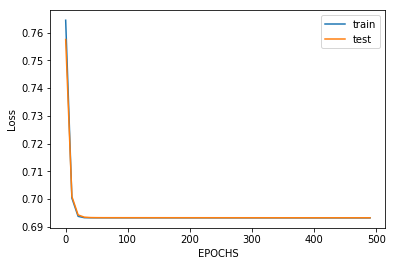

In [57]:
train_line, = plt.plot(epoch_his,train_loss_his,label = 'train')
test_line, = plt.plot(epoch_his,test_loss_his,label = 'test')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.legend([train_line, test_line] , ['train','test'])
plt.show()

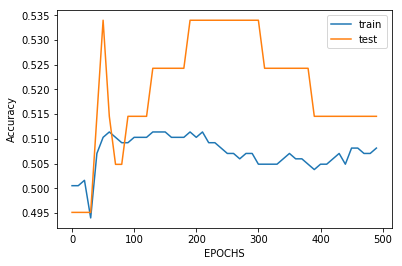

In [58]:
train_line, = plt.plot(epoch_his,train_acc_his,label = 'train')
test_line, = plt.plot(epoch_his,test_acc_his,label = 'test')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend([train_line, test_line] , ['train','test'])
plt.show()
plt.show()